In [69]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

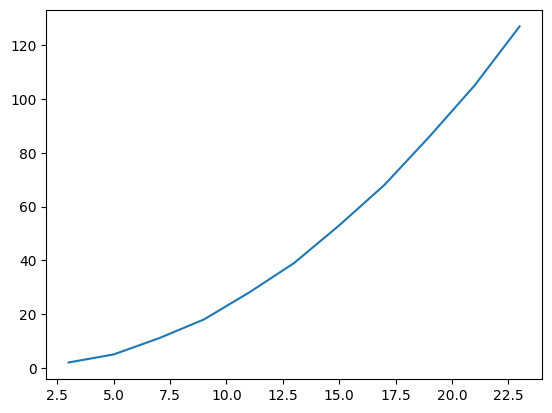

In [68]:
num_nodes = np.arange(3, 25, 2)
num_edges = np.array(np.ceil(num_nodes * (num_nodes - 1) / 2 / 2), dtype=int)

plt.plot(num_nodes, num_edges)

In [71]:
def _create_complete_graph(n, weight_function):
    matrix = np.ones((n, n), dtype=np.float64) - np.eye(n)
    w = weight_function(matrix)
    return matrix * w

def create_graph(n, m, weight_function):
    matrix = _create_complete_graph(n, weight_function)
    num_edges_to_remove = int(n * (n - 1) / 2) - m
    
    edges_pos = np.argwhere(matrix != 0)
    edges_pos = edges_pos[edges_pos[:, 0] != edges_pos[:, 1]]
    
    to_remove = [edges_pos[idx] for idx in 
                 np.random.choice(np.arange(len(edges_pos)), num_edges_to_remove, replace=False)]
    
    for i, j in to_remove:
        matrix[i, j] = 0
        matrix[j, i] = 0
        
    return matrix
    
def weight_function(matrix):
    w = np.copy(matrix)
    for i in range(len(matrix)):
        for j in range(i + 1, len(matrix)):
            w[i, j] = round(np.random.normal(0, 5), 2)
            w[j, i] = w[i, j]
    w += abs(w.min()) + 1
    return w
    
def to_csv(matrix, name):
    source, sink, weight = [], [], []
    for i in range(len(matrix)):
        for j in range(i + 1, len(matrix)):
            if matrix[i, j] == 0:
                continue
            source.append(i)
            sink.append(j)
            weight.append(matrix[i, j])
    df = pd.DataFrame({'Source': source, 'Sink': sink, 'Weight': weight})
    df.to_csv(f'./{name}.csv', index=False)

In [72]:
num_tests = 5
for n, m in zip(num_nodes, num_edges):
    path = f'./test-cases/Nodes({n})_Edges({m})/'
    for j in range(num_tests):
        if not os.path.exists(path):
            os.makedirs(path)
        matrix = create_graph(n, m, weight_function)
        to_csv(matrix, path + f'graph_{n}_{m}_({j})')